# <u><font color=blue>Lending Club Case Study</u> 
<b><u>ML61 - Ramesh Velivela

## <font color=blue>Introduction

We work for a <b> <font color=blue>Consumer Finance company</font></b> which specializes in lending various types of loans to urban customers. <b><u>Company has to make a decision for loan approval based on the applicant’s risk profile</u></b>. 

<font color=blue><b><u>Business Objective:</font></u></b><p>Company is looking for <b><u>detailed insights on various dimensions / driving factors causing the loan default (strong indicators of defaulters), which they can utilize during portfolio planning and risk assessment by their underwriters<u></b>.

## <font color=blue>Import all the required python libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.reset_option("all")
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.width', 400)

### <font color=blue>Load the loan.csv file

In [15]:
#Load loan dataset from its csv file
loan=pd.read_csv(r"E:\Ramesh\UpGradCaseStudies\LendingClub\loan.csv")

### <font color=blue>Know your data & its dimensions / few high level characteristics

In [16]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [18]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [20]:
loan.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,39717.0,NaN,NaN,NaN,683131.91306,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,NaN,NaN,NaN,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,NaN,NaN,NaN,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,NaN,NaN,NaN,10947.713196,7187.23867,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,NaN,NaN,NaN,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,39678.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color=blue> Drop all NULL Columns from loan dataset as no analysis can be done on them

In [21]:
# Drop all null columns from loan dataset
loan = loan.dropna(axis=1, how="all")
print(   loan.info(max_cols=200)   )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
print("After dropping null columns, the share of the loan data set is:", loan.shape)

After dropping null columns, the share of the loan data set is: (39717, 57)


### <font color=blue>List null and not null columns in the given loan dataset

In [23]:
# print all null columns in dataset
loan_null_cols = loan.columns[loan.isnull().any()]
print("Total null columns in loan dataset: ", len(loan_null_cols))
print(loan_null_cols)

Total null columns in loan dataset:  14
Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [24]:
# print all not null columns in dataset
loan_not_null_cols = loan.columns[~loan.isnull().any()]
print("Total Not null columns in loan dataset: \t", len(loan_not_null_cols))
print("\n", loan_not_null_cols)

Total Not null columns in loan dataset: 	 43

 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')


### <font color=blue> Prepare list of Numerical, and Categorical columns from the given loan dataset and exclude all NULL Columns by leveraging above list variables

In [25]:
loan_numeric_cols = loan[loan.select_dtypes(exclude=['object']).columns.tolist()] # get all non-object type columns as numeric
loan_numeric_cols = list(filter(lambda col: col in loan_not_null_cols, loan_numeric_cols)) # filter out null numeric cols
print("List of all NOT NULL NUMERICAL columns from loan dataset:\n\n", loan_numeric_cols)
print("\nTotal number of NOT NULL NUMERICAL columns: \t", len(loan_numeric_cols))

List of all NOT NULL NUMERICAL columns from loan dataset:

 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt']

Total number of NOT NULL NUMERICAL columns: 	 27


In [26]:
loan_cat_cols = loan[loan.select_dtypes(include=['object']).columns.tolist()] # get all object type columns as categorical
loan_cat_cols = list(filter(lambda col: col in loan_not_null_cols, loan_cat_cols)) # filter out null object type cols
print("List of all NOT NULL CATEGORICAL columns from loan dataset:\n\n", loan_cat_cols)
print("\nTotal number of NOT NULL CATEGORICAL columns: \t", len(loan_cat_cols))

List of all NOT NULL CATEGORICAL columns from loan dataset:

 ['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type']

Total number of NOT NULL CATEGORICAL columns: 	 16


### <font color = blue> As per given Data Dictionary, list the potential  columns of interest to perform risk analysis on loan disbursement 

In [27]:
loan_potential_cols_for_analysis = ['addr_state', 'annual_inc', 'delinq_2yrs','dti', 'earliest_cr_line', 'emp_length', 'funded_amnt', 'funded_amnt_inv','grade', 'home_ownership', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'verification_status', 'zip_code']
print(loan.shape)

(39717, 57)


### <font color=blue>Drop all the other columns apart from the above identified columns

In [28]:
loan = loan[loan_potential_cols_for_analysis] # simplified to drop the unwanted columns
print(loan.shape)
print(loan.columns)

(39717, 36)
Index(['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'verification_status',
       'zip_code'],
      dtype='object')


### <font color=blue>Till here, we have performed <u>vertical fragmentation by removing unwanted columns (axis=1) from source dataset</u>.
### <font color=blue>Now we need to perform similar on <u>"rows" (axis=0) i.e., handle missing values by either dropping the row or compute the missing value. </font></u>
    
### <font color = blue> As first step, Check for Missing Values and then, identify possible columns to handle / standardize / impute them.

In [29]:
# Percentage of null values by each column in loan dataset
round( (   loan.isnull().sum()  /  len(loan)  ) * 100, 2)

addr_state             0.00
annual_inc             0.00
delinq_2yrs            0.00
dti                    0.00
earliest_cr_line       0.00
emp_length             2.71
funded_amnt            0.00
funded_amnt_inv        0.00
grade                  0.00
home_ownership         0.00
inq_last_6mths         0.00
installment            0.00
int_rate               0.00
issue_d                0.00
last_credit_pull_d     0.01
last_pymnt_amnt        0.00
last_pymnt_d           0.18
loan_amnt              0.00
loan_status            0.00
open_acc               0.00
out_prncp              0.00
out_prncp_inv          0.00
pub_rec                0.00
purpose                0.00
recoveries             0.00
revol_bal              0.00
revol_util             0.13
sub_grade              0.00
term                   0.00
total_acc              0.00
total_pymnt            0.00
total_rec_int          0.00
total_rec_late_fee     0.00
total_rec_prncp        0.00
verification_status    0.00
zip_code            

#####  emp_length column is having 2.71% of nulls / blanks, which are to be dropped

In [31]:
#Drop all null rows as per emp_length column
loan.dropna(axis=0, subset=["emp_length"], inplace=True)

##### Recheck the missing values

In [32]:
round( (   loan.isnull().sum()  /  len(loan)  ) * 100, 2)

addr_state             0.00
annual_inc             0.00
delinq_2yrs            0.00
dti                    0.00
earliest_cr_line       0.00
emp_length             0.00
funded_amnt            0.00
funded_amnt_inv        0.00
grade                  0.00
home_ownership         0.00
inq_last_6mths         0.00
installment            0.00
int_rate               0.00
issue_d                0.00
last_credit_pull_d     0.01
last_pymnt_amnt        0.00
last_pymnt_d           0.17
loan_amnt              0.00
loan_status            0.00
open_acc               0.00
out_prncp              0.00
out_prncp_inv          0.00
pub_rec                0.00
purpose                0.00
recoveries             0.00
revol_bal              0.00
revol_util             0.12
sub_grade              0.00
term                   0.00
total_acc              0.00
total_pymnt            0.00
total_rec_int          0.00
total_rec_late_fee     0.00
total_rec_prncp        0.00
verification_status    0.00
zip_code            

### <font color=blue> Since we need to come up with detailed insights on risk indicators, we can ignore the loans which are currently in-progress or whose status is current.

### <font color = blue>Hence, need to remove rows whose loan_status = "Current" (case sensitive)

In [33]:
#remove rows whose loan_status = "Current" (case sensitive)
loan = loan[(loan.loan_status != "Current")]
print("Post removal of CURRENT loans, count of distinct load_status are: ", loan.loan_status.nunique())
print("")
print("Count of Rows:", loan.groupby(['loan_status'])['loan_status'].count())

Post removal of CURRENT loans, count of distinct load_status are:  2

Count of Rows: loan_status
Charged Off     5399
Fully Paid     32145
Name: loan_status, dtype: int64


In [34]:
# Now mark Charged Off which indicates defaulted as 1 and Fully Paid as 0 for ease of analysis

loan['loan_status'].replace(['Fully Paid', 'Charged Off'],[0,1], inplace=True)
loan['loan_status'] = loan['loan_status'].astype(int)

print("Count of Rows:", loan.groupby(['loan_status'])['loan_status'].count())

Count of Rows: loan_status
0    32145
1     5399
Name: loan_status, dtype: int64


### <font color=blue> Now potential numerical columns need to have only numerical values without symbols to apply arithmatic analysis.
<ul><li>Both <b>int_rate and revol_util are having % symbol</b>. Need to remove %.</ul>
<ul><li><b>"term" column indicates numeric value but, it has text associated with it</b>. Need to remove the text "months" from this "term" column to make it ready for arithmatic analysis.</li></ul>
<ul><li>Verify <b>"purpose" column and remove certain rows whose pupose % is <1.</li></ul>
<ul><li><b>emp_length column also has text associated with a number, so, need to alter to get its values as numeric.

In [35]:
#remove % symbol from int_rate column
loan["int_rate"] = loan["int_rate"].str.replace("%", "")
loan["int_rate"].astype(float)

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 37544, dtype: float64

In [36]:
#remove % symbol from revol_util column
loan["revol_util"] = loan["revol_util"].str.replace("%", "")
loan["revol_util"].astype(float)

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [37]:
#remove "months" word from term column
loan["term"] = loan["term"].str.replace("months", "")
loan["term"].astype(int)

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 37544, dtype: int32

In [38]:
#verify "purpose" column value counts.

loan_purpose_values = loan["purpose"].value_counts()*100/len(loan)
print("BEFORE removing value counts <1% on purpose column:")
print()
print(loan_purpose_values)

#remove certain rows whose pupose % is <1.
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
loan = loan[[False if p in loan_purpose_delete else True for p in loan["purpose"]]]

print()

#re-check purpose value counts
loan_purpose_values = loan["purpose"].value_counts()*100/len(loan)
print("AFTER removing value counts <1% on purpose column:")
print()
print(loan_purpose_values)


BEFORE removing value counts <1% on purpose column:

debt_consolidation    47.078095
credit_card           13.048690
other                  9.889729
home_improvement       7.417963
major_purchase         5.540166
small_business         4.554656
car                    3.856808
wedding                2.431813
medical                1.747283
moving                 1.470275
house                  0.942894
vacation               0.926912
educational            0.844343
renewable_energy       0.250373
Name: purpose, dtype: float64

AFTER removing value counts <1% on purpose column:

debt_consolidation    48.516373
credit_card           13.447339
other                 10.191870
home_improvement       7.644588
major_purchase         5.709423
small_business         4.693805
car                    3.974637
wedding                2.506107
medical                1.800664
moving                 1.515193
Name: purpose, dtype: float64


In [39]:
# update emp_length column with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
loan["emp_length"] = pd.to_numeric(loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

### <font color = blue>Add derived fields for Date type columns for make aggregations easy

In [40]:
# Add month and year on issue_d as derived columns
loan['issue_d'] = pd.to_datetime(loan.issue_d.str.upper(), format='%b-%y', yearfirst=False)
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')

In [41]:
# Add month and year on earliest_cr_line as derived columns
loan['earliest_cr_line']=pd.to_datetime(loan.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
loan['earliest_cr_line_year']=loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month']=loan.earliest_cr_line.dt.strftime('%b')

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   addr_state              36431 non-null  object        
 1   annual_inc              36431 non-null  float64       
 2   delinq_2yrs             36431 non-null  int64         
 3   dti                     36431 non-null  float64       
 4   earliest_cr_line        36431 non-null  datetime64[ns]
 5   emp_length              36431 non-null  int64         
 6   funded_amnt             36431 non-null  int64         
 7   funded_amnt_inv         36431 non-null  float64       
 8   grade                   36431 non-null  object        
 9   home_ownership          36431 non-null  object        
 10  inq_last_6mths          36431 non-null  int64         
 11  installment             36431 non-null  float64       
 12  int_rate                36431 non-null  object

### <font color=Blue> Find the outliers, treat them for optimal analysis


In [43]:
loan.describe()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,...,pub_rec,recoveries,revol_bal,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,issue_d_year,earliest_cr_line_year
count,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,...,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,6.951579e+04,0.146606,13.342387,4.946611,10930.837748,10359.939810,0.864785,326.822209,2790.312486,11199.235541,...,0.053608,98.412799,13491.049903,22.133073,12047.731189,2158.093030,1.364659,9789.860785,2010.307979,1996.885839
std,6.495930e+04,0.493437,6.646199,3.557477,7094.193692,7032.986185,1.064331,208.785315,4530.096023,7352.034725,...,0.234676,703.233794,15939.593055,11.402427,8835.250407,2406.436398,7.336363,7024.441768,0.883193,7.026643
min,4.080000e+03,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,15.690000,0.000000,500.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1969.000000
25%,4.130000e+04,0.000000,8.220000,2.000000,5500.000000,5000.000000,0.000000,168.910000,223.870000,5512.500000,...,0.000000,0.000000,3809.500000,14.000000,5612.522810,667.820000,0.000000,4750.000000,2010.000000,1994.000000
50%,6.000000e+04,0.000000,13.440000,4.000000,9700.000000,8975.000000,1.000000,282.520000,585.760000,10000.000000,...,0.000000,0.000000,8989.000000,20.000000,9899.640319,1338.200000,0.000000,8000.000000,2011.000000,1998.000000
75%,8.300000e+04,0.000000,18.600000,9.000000,15000.000000,14269.309200,1.000000,432.155000,3535.450000,15000.000000,...,0.000000,0.000000,17141.500000,29.000000,16365.293640,2722.910000,0.000000,13500.000000,2011.000000,2001.000000
max,6.000000e+06,11.000000,29.990000,10.000000,35000.000000,35000.000000,8.000000,1305.190000,36115.200000,35000.000000,...,4.000000,29623.350000,149588.000000,90.000000,58563.679930,23563.680000,180.200000,35000.020000,2011.000000,2068.000000


In [44]:
#1: 
# As per the above, annual_inc's max value is 6000000 where 75% quantile value is 83000, is significant variance of its mean.
# suggest to remomve outliers from annual_inc column - 99 to 100%
annual_inc_quantile = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_quantile]


#2:
# Similarly, open_acc's maximum value is 29 where 75% quantile value is 12, and is beyond 3 times the mean
# suggest to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_quantile = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_quantile]

#3
# Now total_acc's maximum value is 49.0 where 75% quantile value is 28.0, and is almost thrice the mean
# suggest to remomve outliers from total_acc i.e. 98 to 100%
total_acc_quantile = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_quantile]


# Now pub_rec's maximum value is 1 where 75% quantile value is 0, and is significantly higher than its mean
# suggest to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_quantile = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_quantile]

In [45]:
loan.describe()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,...,pub_rec,recoveries,revol_bal,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,issue_d_year,earliest_cr_line_year
count,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,...,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000,35194.000000
mean,65419.461103,0.144314,13.344928,4.905524,10796.314713,10234.317759,0.853896,322.737475,2723.660999,11057.526141,...,0.051316,98.041975,13080.680940,21.278229,11884.145128,2125.747915,1.371290,9658.984033,2010.308092,1997.036455
std,34737.155886,0.487972,6.632239,3.547242,6991.908594,6929.975191,1.054758,205.279127,4437.449906,7243.279733,...,0.220644,698.097324,15294.184407,10.211237,8689.253314,2359.840453,7.360139,6913.735096,0.884138,6.938863
min,4080.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,15.690000,0.000000,500.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1969.000000
25%,40590.500000,0.000000,8.240000,2.000000,5425.000000,5000.000000,0.000000,167.840000,221.107500,5500.000000,...,0.000000,0.000000,3734.250000,13.000000,5580.248214,662.955000,0.000000,4600.000000,2010.000000,1994.000000
50%,58000.000000,0.000000,13.440000,4.000000,9600.000000,8867.378611,1.000000,279.830000,568.970000,9950.000000,...,0.000000,0.000000,8813.000000,20.000000,9770.771752,1326.505000,0.000000,8000.000000,2011.000000,1998.000000
75%,80004.000000,0.000000,18.580000,9.000000,15000.000000,14000.000000,1.000000,424.857500,3438.347500,15000.000000,...,0.000000,0.000000,16748.500000,28.000000,16104.167952,2679.530000,0.000000,13080.467500,2011.000000,2001.000000
max,234996.000000,11.000000,29.990000,10.000000,35000.000000,35000.000000,8.000000,1305.190000,36115.200000,35000.000000,...,1.000000,29623.350000,149588.000000,49.000000,58563.679930,23563.680000,180.200000,35000.020000,2011.000000,2068.000000


In [46]:
loan

,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,...,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,verification_status,zip_code,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,AZ,24000.0,0,27.65,1985-01-01,10,5000,4975.0,B,RENT,...,5863.155187,863.16,0.00,5000.00,Verified,860xx,2011,Dec,1985,Jan
1,GA,30000.0,0,1.00,1999-04-01,0,2500,2500.0,C,RENT,...,1008.710000,435.17,0.00,456.46,Source Verified,309xx,2011,Dec,1999,Apr
2,IL,12252.0,0,8.72,2001-11-01,10,2400,2400.0,C,RENT,...,3005.666844,605.67,0.00,2400.00,Not Verified,606xx,2011,Dec,2001,Nov
3,CA,49200.0,0,20.00,1996-02-01,10,10000,10000.0,C,RENT,...,12231.890000,2214.92,16.97,10000.00,Source Verified,917xx,2011,Dec,1996,Feb
5,AZ,36000.0,0,11.20,2004-11-01,3,5000,5000.0,A,RENT,...,5632.210000,632.21,0.00,5000.00,Source Verified,852xx,2011,Dec,2004,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,0,11.33,1990-11-01,4,2500,1075.0,A,MORTGAGE,...,2822.969293,322.97,0.00,2500.00,Not Verified,802xx,2007,Jul,1990,Nov
39713,NC,18000.0,1,6.40,1986-12-01,3,8500,875.0,C,RENT,...,9913.491822,1413.49,0.00,8500.00,Not Verified,274xx,2007,Jul,1986,Dec
39714,MA,100000.0,0,2.30,1998-10-01,0,5000,1325.0,A,MORTGAGE,...,5272.161128,272.16,0.00,5000.00,Not Verified,017xx,2007,Jul,1998,Oct
39715,MD,200000.0,0,3.72,1988-11-01,0,5000,650.0,A,MORTGAGE,...,5174.198551,174.20,0.00,5000.00,Not Verified,208xx,2007,Jul,1988,Nov


In [47]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35194 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   addr_state              35194 non-null  object        
 1   annual_inc              35194 non-null  float64       
 2   delinq_2yrs             35194 non-null  int64         
 3   dti                     35194 non-null  float64       
 4   earliest_cr_line        35194 non-null  datetime64[ns]
 5   emp_length              35194 non-null  int64         
 6   funded_amnt             35194 non-null  int64         
 7   funded_amnt_inv         35194 non-null  float64       
 8   grade                   35194 non-null  object        
 9   home_ownership          35194 non-null  object        
 10  inq_last_6mths          35194 non-null  int64         
 11  installment             35194 non-null  float64       
 12  int_rate                35194 non-null  object

In [48]:
loan.columns

Index(['addr_state', 'annual_inc', 'delinq_2yrs', 'dti', 'earliest_cr_line',
       'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pub_rec', 'purpose', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'verification_status',
       'zip_code', 'issue_d_year', 'issue_d_month', 'earliest_cr_line_year',
       'earliest_cr_line_month'],
      dtype='object')

### <font color=blue> EDA & our observations 

<AxesSubplot:xlabel='annual_inc'>

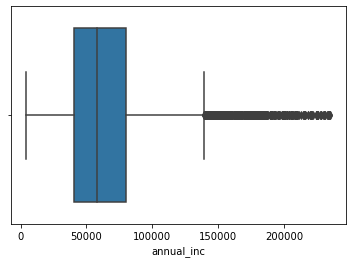

In [49]:
#generate boxplot & verify
sns.boxplot(loan['annual_inc'])

In [51]:
# Quantiles divides a dataset into equal parts based on the probability distribution. This helps us to understand the spread and central tendency of data.
# Verify annual_inc quantile values for its continuity
loan.annual_inc.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750     80004.00
0.900    110004.00
0.950    133000.00
0.970    150000.00
0.975    156000.00
0.980    165000.00
0.990    186004.41
1.000    234996.00
Name: annual_inc, dtype: float64

As data is continuous for annual_inc, so, no action is required.

### <font color=blue>Create bins for categorical analysis on loan amount, annual income, interest rate and dti

In [52]:
# Bin for loan_amnt
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_loan_amnt = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels = bucket_loan_amnt)

In [53]:
# Bin for annual_inc
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_annual_inc = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_annual_inc)

In [54]:
# Bin for dti
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_dti = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_dti)

In [55]:
# Bin for int_rate
loan['int_rate'] = pd.to_numeric(loan['int_rate']) 
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_int_rate = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels = bucket_int_rate)

In [56]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35194 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   addr_state              35194 non-null  object        
 1   annual_inc              35194 non-null  float64       
 2   delinq_2yrs             35194 non-null  int64         
 3   dti                     35194 non-null  float64       
 4   earliest_cr_line        35194 non-null  datetime64[ns]
 5   emp_length              35194 non-null  int64         
 6   funded_amnt             35194 non-null  int64         
 7   funded_amnt_inv         35194 non-null  float64       
 8   grade                   35194 non-null  object        
 9   home_ownership          35194 non-null  object        
 10  inq_last_6mths          35194 non-null  int64         
 11  installment             35194 non-null  float64       
 12  int_rate                35194 non-null  float6

In [57]:
loan.head()

,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,...,verification_status,zip_code,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_range,annual_inc_range,dti_range,int_rate_range
0,AZ,24000.0,0,27.65,1985-01-01,10,5000,4975.0,B,RENT,...,Verified,860xx,2011,Dec,1985,Jan,0-5000,0-25000,25%+,10-12.5
1,GA,30000.0,0,1.00,1999-04-01,0,2500,2500.0,C,RENT,...,Source Verified,309xx,2011,Dec,1999,Apr,0-5000,25000-50000,0-5%,15+
2,IL,12252.0,0,8.72,2001-11-01,10,2400,2400.0,C,RENT,...,Not Verified,606xx,2011,Dec,2001,Nov,0-5000,0-25000,5-10%,15+
3,CA,49200.0,0,20.00,1996-02-01,10,10000,10000.0,C,RENT,...,Source Verified,917xx,2011,Dec,1996,Feb,5000-10000,25000-50000,15-20%,12.5-15
5,AZ,36000.0,0,11.20,2004-11-01,3,5000,5000.0,A,RENT,...,Source Verified,852xx,2011,Dec,2004,Nov,0-5000,25000-50000,10-15%,7.5-10


## <font color=blue><u> EDA - Visualizations and Observations

## <font color=blue><u><b> Univariate Analysis
    
### <font color=blue>Visualize the loan status through countplot 

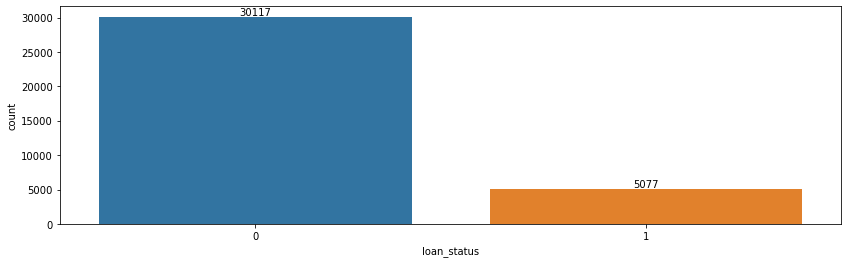

In [62]:
# check for amount of defaults in the data using countplot

plt.figure(figsize=(14,4))
ax = sns.countplot(x="loan_status", data=loan)
abs_values = loan['loan_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


<b>Observation:</b> Defaulted loans a.k.a <b>Charged Off loans are less when compared to Fully paid loans

### <font color = blue>Visualize defaulters group by loan term

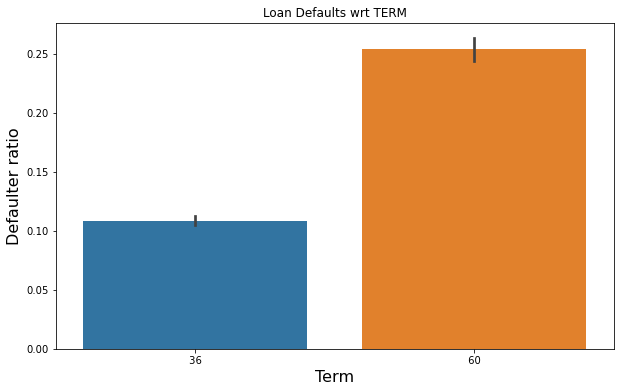

In [63]:
# Generate barplot to find the defaulters ratio by the loan term

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="term", y='loan_status', data=loan)
plt.title("Loan Defaults wrt TERM")
plt.xlabel("Term", fontsize=16)
plt.ylabel("Defaulter ratio", fontsize=16)
plt.show()

<b> Observation: When compared to 36 months tenure, 60 months term loans are more defaulted.

### <font color = blue>Visualize Loan Status by Grade

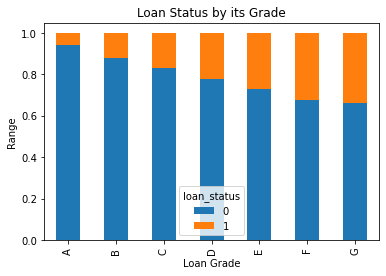

In [65]:
# Generate stacked bar plot for Loan status by its grade

ctab = pd.crosstab(loan['grade'], loan['loan_status'], normalize='index')
ctab.plot(kind='bar', stacked=True)
plt.xlabel('Loan Grade')
plt.ylabel('Range')
plt.title('Loan Status by its Grade')
plt.show()

<b> Observation:</b> Loans with LOW grades (towards grade A) are resulting into highly probable fully paid loans. <p> Loans with HIGH grades (towards grade G) are highly potential as "Defaulted".

### <font color=Blue>Generate graph ONLY with defaulted loans (%) by "sub Grades"

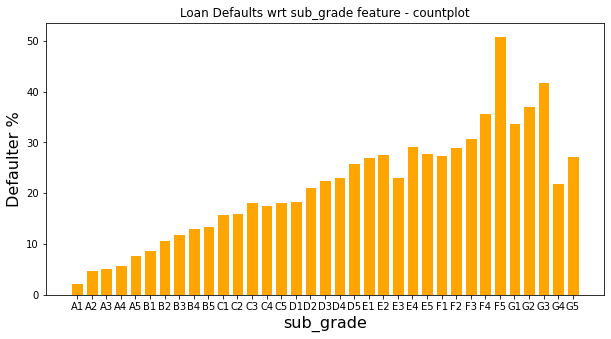

In [66]:
# Plot the bar graph to find spread of defaulter's % by their sub_grade

plt.figure(figsize=(10,5))
feature_dimension = sorted(loan["sub_grade"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["sub_grade"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults wrt sub_grade feature - countplot")
plt.xlabel("sub_grade", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()


<b> Observation:</b> Loan Sub Grades dimension is a great indicative and Defaulted loans are gradually increasing from A1 towards G5 sub grade. 

### <font color=Blue>Generate graph ONLY with defaulted loans (%) as per applicant's home ownership status.

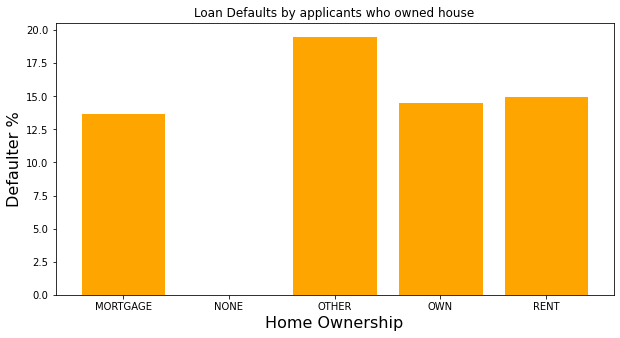

In [67]:
# Generate graph to find out how defaulter's % by enumeration of Home Ownership values? 

plt.figure(figsize=(10,5))
feature_dimension = sorted(loan["home_ownership"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["home_ownership"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults by applicants who owned house")
plt.xlabel("Home Ownership", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b> Observation:</b> Home ownership dimension is <b><u>not helpful to find any risk trends</u></b> as we observe defaulted loans in every category of home ownership. 

### <font color=Blue>Generate graph ONLY with defaulted loans (%) basing on applicant's Verification Status.

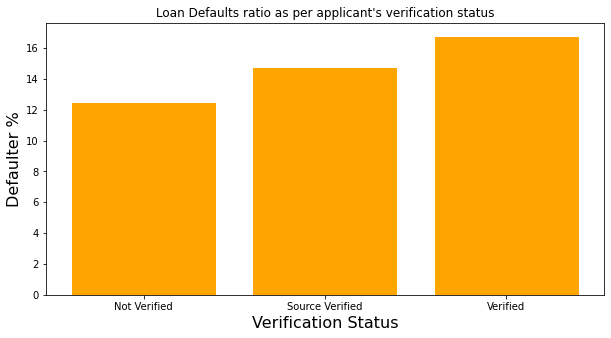

In [69]:
# Generate graph to find out how defaulter's % by verification status values? 

plt.figure(figsize=(10,5))
feature_dimension = sorted(loan["verification_status"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["verification_status"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults ratio as per applicant's verification status")
plt.xlabel("Verification Status", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b> Observation:</b> Similar to Home ownership dimension observation, Verification Status is also <b><u>not helpful to find any risk trends</u></b> as we observe defaulted loans in every category of this dimension. 

### <font color=Blue>Graph to show the loan amount distribution range and find any risk indicators?

<AxesSubplot:xlabel='loan_amnt_range', ylabel='count'>

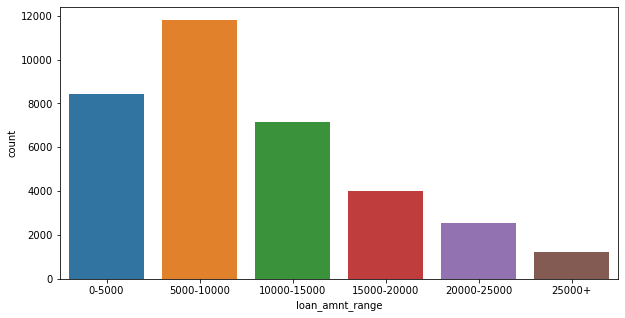

In [71]:
#Generate graph for loan amount range.

plt.figure(figsize=(10,5))
sns.countplot(x='loan_amnt_range', data=loan)

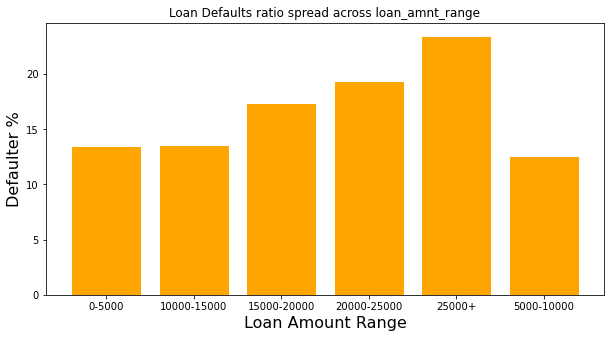

In [72]:
#Generate graph to show defaulter % by the respective loan amount range 

plt.figure(figsize=(10,5))
feature_dimension = sorted(loan["loan_amnt_range"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["loan_amnt_range"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults ratio spread across loan_amnt_range")
plt.xlabel("Loan Amount Range", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b> Observation: </b> <br> Majority of the loans given in the range of 5k to 10k. But, <b>we observe defaulters are spread across every range, though 25k+ is dominated followed by 15k-20k and 20k to 25k range. Hence, <b>this Loan Amount Range doesn't give any specific clear risk indicator</b> 

### <font color=blue> Defaulted Loans Amount Range spread

In [74]:
#Create a dataset with only defaulted loans data

defaulted_loans=loan[(loan["loan_status"]==1)]

Text(0.5, 1.0, 'Defaulted Loan Amount spread')

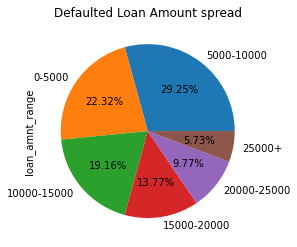

In [76]:
# Generate a pie chart with loan amount range values and % of its spread. 

defaulted_loans['loan_amnt_range'].value_counts().plot(kind='pie', autopct='%2.2f%%')
plt.title('Defaulted Loan Amount spread')

<b>Observation:</b> <br><b>Loan amount 5k-10k range is dominated followed by 0-5k and 10k-15k

### <font color=blue> Defaulted Loans spread across Loan Interest range

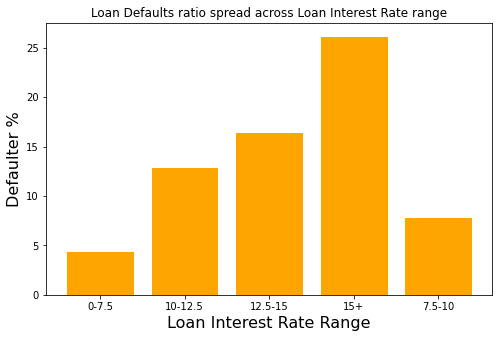

In [77]:
#Generate graph to show defaulter % by the respective loan Interest Rate range 

plt.figure(figsize=(8,5))
feature_dimension = sorted(loan["int_rate_range"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["int_rate_range"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults ratio spread across Loan Interest Rate range")
plt.xlabel("Loan Interest Rate Range", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b>Observation:</b> Rate of Interest seems <b>directly proportional to get the loan defaulted as we observe highest rate of interest is having more number of defaulters</b>. <p><b>Lowest defaulters' loan interest rate is between 0 to 7.5, while highest is at 15+ rate of interest.<p>
Largest chunk of defaulters interest rate is above 12.5.

### <font color=blue> Defaulted Loans spread across various Annual Income Range

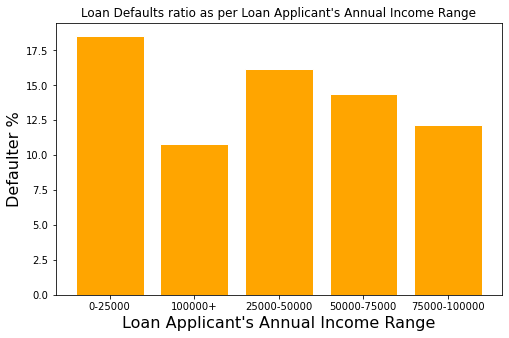

In [363]:
#Generate graph to show defaulter % by the respective loan Applicant's Annual Income Range 

plt.figure(figsize=(8,5))
feature_dimension = sorted(loan["annual_inc_range"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["annual_inc_range"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults ratio as per Loan Applicant's Annual Income Range")
plt.xlabel("Loan Applicant's Annual Income Range", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b>Observation:</b> We have Defaulters spread across every range of applicant's annual income. So, <b><u>this annual income range dimension is not a dominating factor to realize defaulted loans</u></B>. <p>Not a potential risk indicator   

### <font color=blue> Defaulted Loans spread across various DTI Range

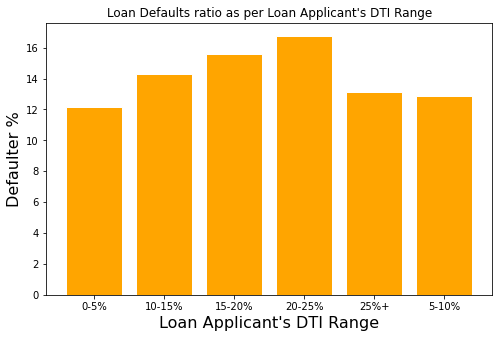

In [78]:
#Generate graph to show defaulter % by the respective loan Applicant's DTI Range 

plt.figure(figsize=(8,5))
feature_dimension = sorted(loan["dti_range"].unique())
feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["dti_range"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])
    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
plt.title("Loan Defaults ratio as per Loan Applicant's DTI Range")
plt.xlabel("Loan Applicant's DTI Range", fontsize=16)
plt.ylabel("Defaulter %", fontsize=16)
plt.show()

<b>Observation:</b> We have Defaulters spread across every range of applicant's DTI. So, <b><u>this DTI range dimension is not a dominating factor to realize defaulted loans</u></B>. <p>Not a potential risk indicator   

### <font color=blue> Defaulted Loans across various "loan purposes" being called out while applying the loan

<AxesSubplot:xlabel='count', ylabel='purpose'>

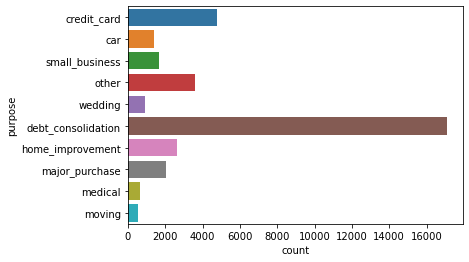

In [81]:
# Generate counterplot on loan purpose

sns.countplot(y=loan.purpose)

<AxesSubplot:xlabel='count', ylabel='purpose'>

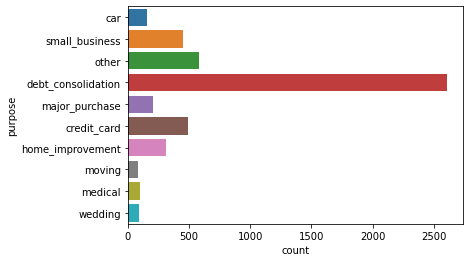

In [82]:
# Generate counterplot on "defaulted loans' purpose"

sns.countplot(y=defaulted_loans.purpose)

<b>Observation:</b><br> Very clear indication that <b>"DEBT CONSOLIDATION" purpose is dominated need for applying loans and the same is acting as major cause to have defaulted loans</b>. <p><p><b> So, this is an important risk indicator to secure from defaulted loans</b>

### <font color=blue> Generate crosstab on Loan Grade by Purpose

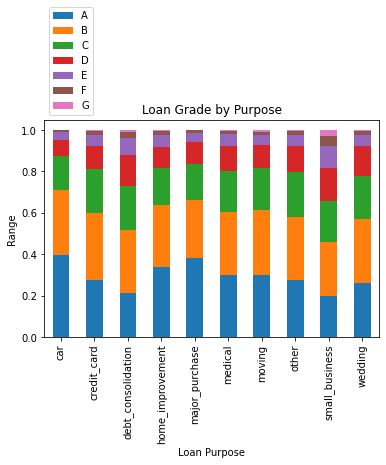

In [83]:
#Loan grade by purpose

crosstab = pd.crosstab(loan['purpose'], loan['grade'], normalize='index')
ax = crosstab.plot(kind='bar', stacked=True)
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Range')
ax.set_title('Loan Grade by Purpose')
ax.legend(loc='lower left', bbox_to_anchor=(0, 1))
plt.show()

<b> Observation: </b><br>
The above stacked bar chart depicts loan purpose and grade it belongs to.

As mentioned in above, <b>Debt consolidation</b> need is the most dominant purpose to apply loans.

Across any loan purpose, <b>majority is contributed from Grades A, B, and C</b>. 

Loans for credit card payments is highest in the E and F loan grades, while the proportion of loans for home improvement and small business are highest in the G loan grade.

<b>These are very important risk factors to consider while underwriters are analyzing the loan application and taking the final decision. They may have to increase the interest rate to mitigate risks based on the purpose they apply for loan. </b>

### <font color=blue> Find out the behavior of loan status as per applicant's employment tenure

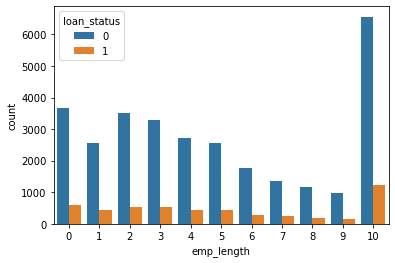

In [84]:
#Generate graph to find the behavior of loan status based on applicant's Employment Tenure

sns.countplot(data=loan, x='emp_length', hue='loan_status')
plt.show()

<b>Observation:</b><br>
Clearly evident that <b>10 and above experienced applicant's are becoming defaulters on their loans</b>. So, Financial institutions need to observe closely before they approve the loan.

### <b><u><font color = blue>Bivariate Analysis

### <font color=blue>Generate Box plot between Loan Status and Interest Rate for each Loan Purpose

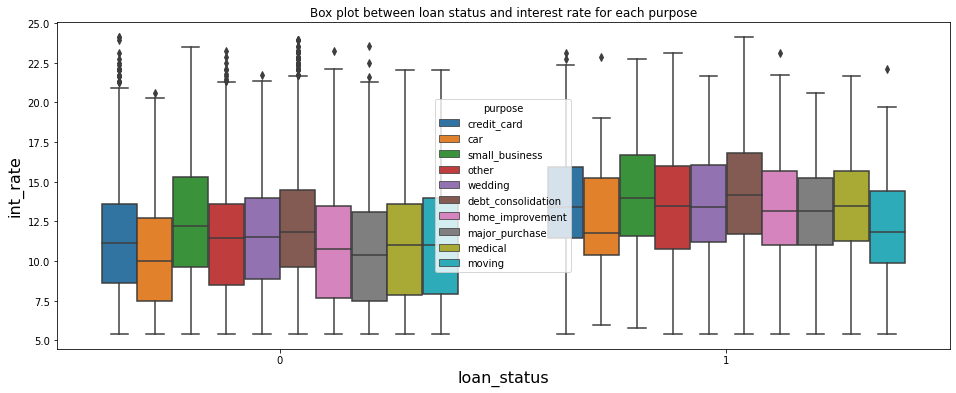

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [86]:
# Generate box plot for loan_status vs int_rate for each purpose

plt.figure(figsize=(16,6))
sns.boxplot(x="loan_status", y="int_rate", data=loan, hue="purpose", order=sorted(loan["loan_status"].unique()))
plt.title("Box plot between loan status and interest rate for each purpose")
plt.xlabel("loan_status", fontsize=16)
plt.ylabel("int_rate", fontsize=16)
plt.show()
plt.figure(figsize=(16,8))

<b> Observation:</b> <br>
Most importantly, <b>If loan Interest rate increases, then corresponding loan may potentially get defaulted.</b> This scenario seems valid for any kind of loan purpose.

So, it is critical for companies not just simply increase the Rate of Interest (RoI) to mitigate the risk, which may deviate their hypothesis and lead towards facing high number of defaulted loans.

### <font color=blue>Generate Box plot between Loan Status and Grade for each Interest Rate

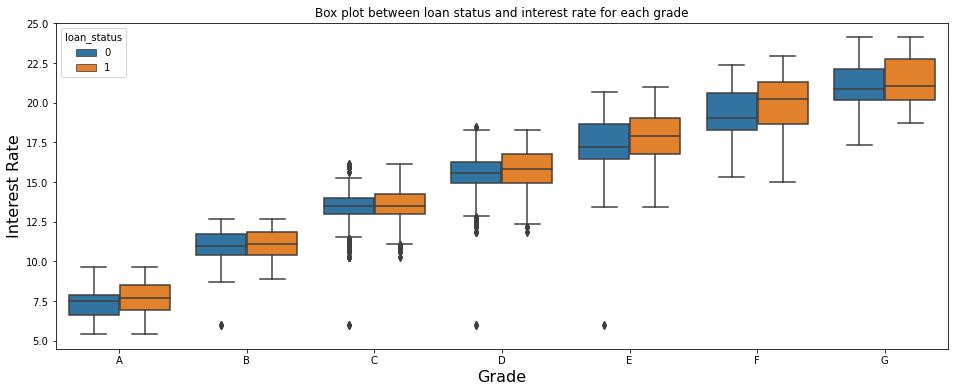

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [87]:
# plot box for loan_status vs int_rate for each purpose

plt.figure(figsize=(16,6))
sns.boxplot(x="grade", y="int_rate", data=loan, hue="loan_status", order=sorted(loan["grade"].unique()))
plt.title("Box plot between loan status and interest rate for each grade")
plt.xlabel("Grade", fontsize=16)
plt.ylabel("Interest Rate", fontsize=16)
plt.show()
plt.figure(figsize=(16,8))

<b> Observation:</b> <br>
Grade and Interest rate are proportional which leads to face high number of defaulters.
<b>Interest rate is increasing for every grade and also the defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate. </b>

### <font color=blue>Generate Box plot between Home Ownership and Loan Amount for Loan Status

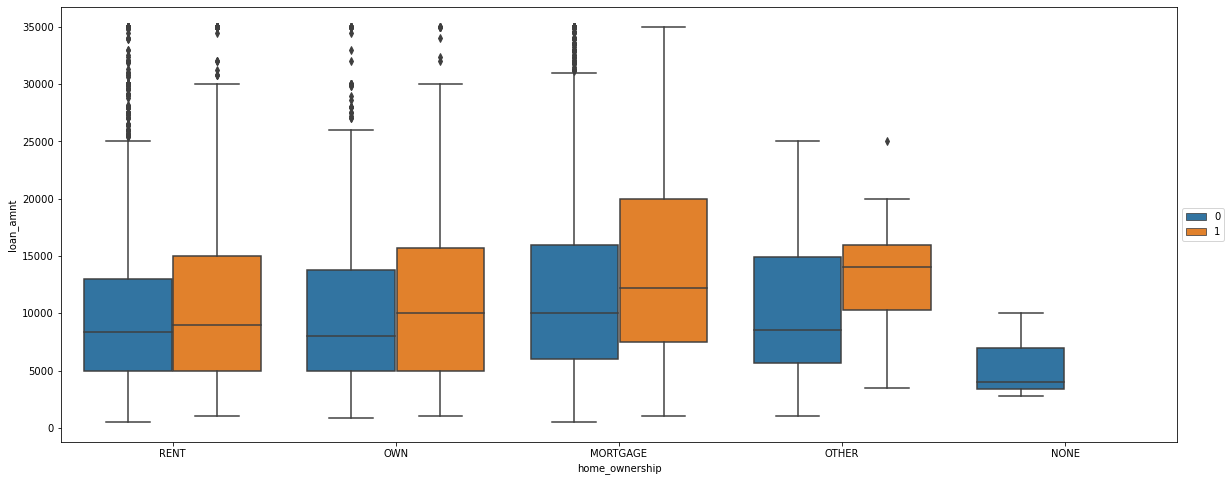

In [384]:
#Home ownership vs loan amount vs loan status
plt.figure(figsize=(20,8))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<b> Observation:</b> <br>
Out of all types of Home Ownership, <b>loan applicants who has Mortgage are taking high amount as loan and also, they are potential  defaulters too</b>. 

### <u><font color=blue>Correlation Analysis (Multivariate)

In [88]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35194 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   addr_state              35194 non-null  object        
 1   annual_inc              35194 non-null  float64       
 2   delinq_2yrs             35194 non-null  int64         
 3   dti                     35194 non-null  float64       
 4   earliest_cr_line        35194 non-null  datetime64[ns]
 5   emp_length              35194 non-null  int64         
 6   funded_amnt             35194 non-null  int64         
 7   funded_amnt_inv         35194 non-null  float64       
 8   grade                   35194 non-null  object        
 9   home_ownership          35194 non-null  object        
 10  inq_last_6mths          35194 non-null  int64         
 11  installment             35194 non-null  float64       
 12  int_rate                35194 non-null  float6

### <font color = blue> Generate the heatmap among few associated columns from the loan dataset

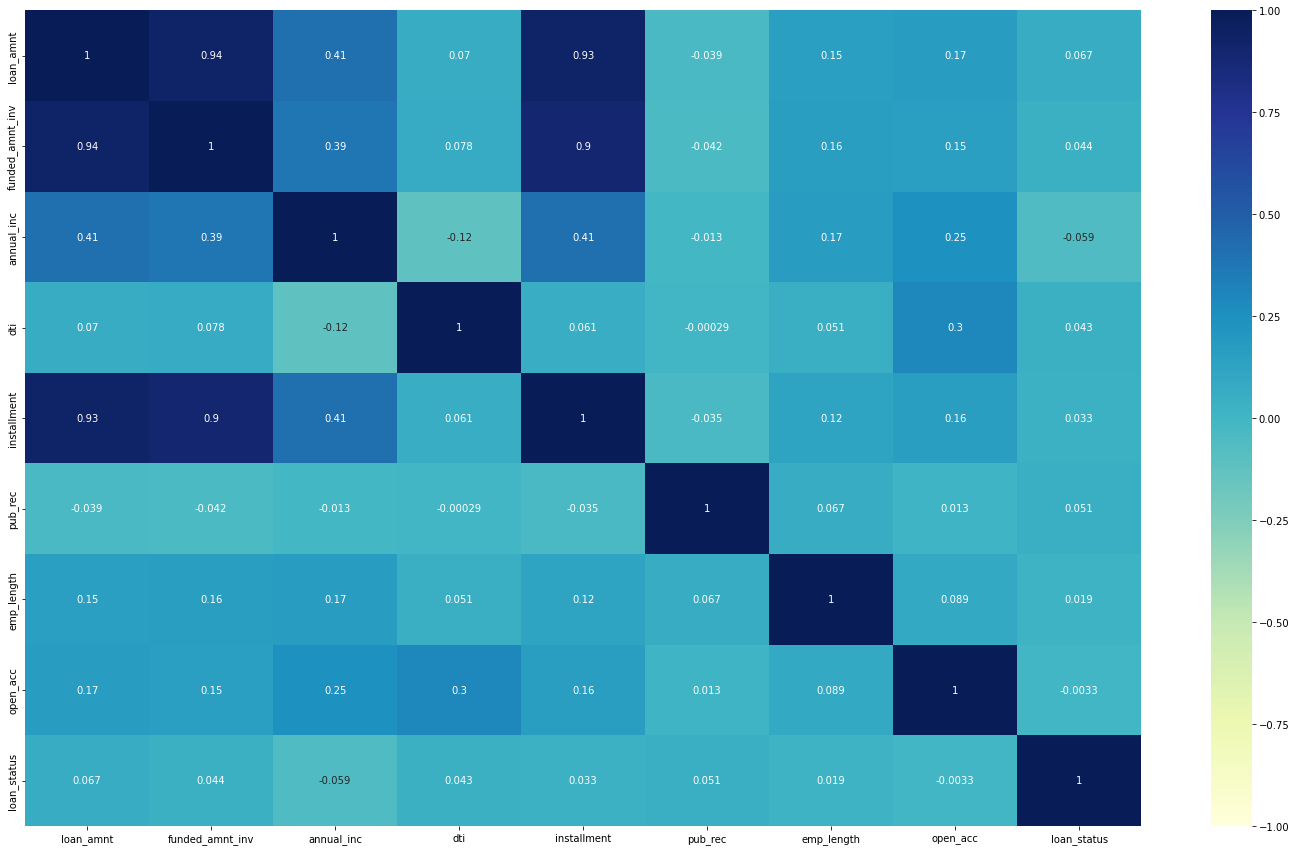

In [90]:
# Generate the heat map for ['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec', 'emp_length','open_acc','int_rate_range', 'loan_status']

plt.figure(figsize=(25,15))
corr_df = loan[['loan_amnt','funded_amnt_inv','annual_inc', 'dti', 'installment','pub_rec', 'emp_length','open_acc','int_rate_range', 'loan_status']]
sns.heatmap(corr_df.corr(), vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.show()

<b> Observation

<li>Highest positive correlation between loan_amnt, funded_amnt_inv and installment<br>
<li>Negative correlation is between annual_inc and dti

### Observation Summary:
#### Univariate Analysis
<ul><li>More than 70% of the loans are sanctioned for the term of 60 Months
<li> Around 80% of the loans have been granted for loan amount range between 500 and 15K; this is the loan amount range where 3/4th of loans have been defaulted.
<li>More interest rate will leads to get loan defaulted. Almost 50% of defaulted Loans are beyond 13% interest rate.
<li>Loan Purpose as "Debt Consolidation" led to face significant loans defaulted than other purposes.

#### Segmented Univariate Analysis<br>

<li>"High" Loan Term led to face higher loan defaulters (60 months)
<li> Applicants with employement length of 10+ years are mostly defaulters

#### Bivariate Analysis

<li>High Interest Rate is causing high defaulted loans across any loan term and loan amount. So, Financial institutions hiking interest rate may not be a solution to mitigate the risk on loan amount.
<li>Home Ownership of loan applicant as "mortgage" taken high loan amount and have high default ratio; but, defaulted loans have  been spread across enumeration of home ownership values.

#### Correlation Analysis

As per heat map,
<li>funded_amnt_inv, loan amount, installment, and annual income have a positive correlation
<li>Annual Income and dti have negative correlation with loan status. 

Financial Institutions can get benefited with these kind of correlation analysis outcome and avoid/mitigate/minimize the impact of risk on the loans given to various kinds of applicants.
    
#### Recommendations

As per the given source loan data, following are few factors / risk indicators which conveys potential loan default scenarios.
<ol><li>High Interest Rate (beyond ~13%)
<li>High Annual Income (35+ k range)
<li>Long Term (60 months)
<li>Loan purpose to consolidate debts and to replay credit card bills
<li>High experienced loan applicants who are taking high amount (better to avoid to mitigate risk)
</ol>

So, in summary, Annual Income, Home Ownership, Purpose of Loan, Loan Amount, Interest Rate, and Loan Term are critical factors to be considered by Underwriters who perform Risk analysis and decide whether to reject the loan or grant the loan. 